Generation 1: Best Fitness = 30.7045
Generation 2: Best Fitness = 33.5844
Generation 3: Best Fitness = 31.0791
Generation 4: Best Fitness = 30.6868
Generation 5: Best Fitness = 30.0185
Generation 6: Best Fitness = 29.8183
Generation 7: Best Fitness = 36.5585
Generation 8: Best Fitness = 36.5585
Generation 9: Best Fitness = 36.6277
Generation 10: Best Fitness = 34.9827
Generation 11: Best Fitness = 34.9827
Generation 12: Best Fitness = 34.9349
Generation 13: Best Fitness = 35.2230
Generation 14: Best Fitness = 35.2430
Generation 15: Best Fitness = 35.2769
Generation 16: Best Fitness = 34.9929
Generation 17: Best Fitness = 34.9929
Generation 18: Best Fitness = 34.6890
Generation 19: Best Fitness = 35.1441
Generation 20: Best Fitness = 35.2326
Generation 21: Best Fitness = 35.1043
Generation 22: Best Fitness = 35.0741
Generation 23: Best Fitness = 35.0741
Generation 24: Best Fitness = 35.2730
Generation 25: Best Fitness = 34.8896
Generation 26: Best Fitness = 35.1773
Generation 27: Best F

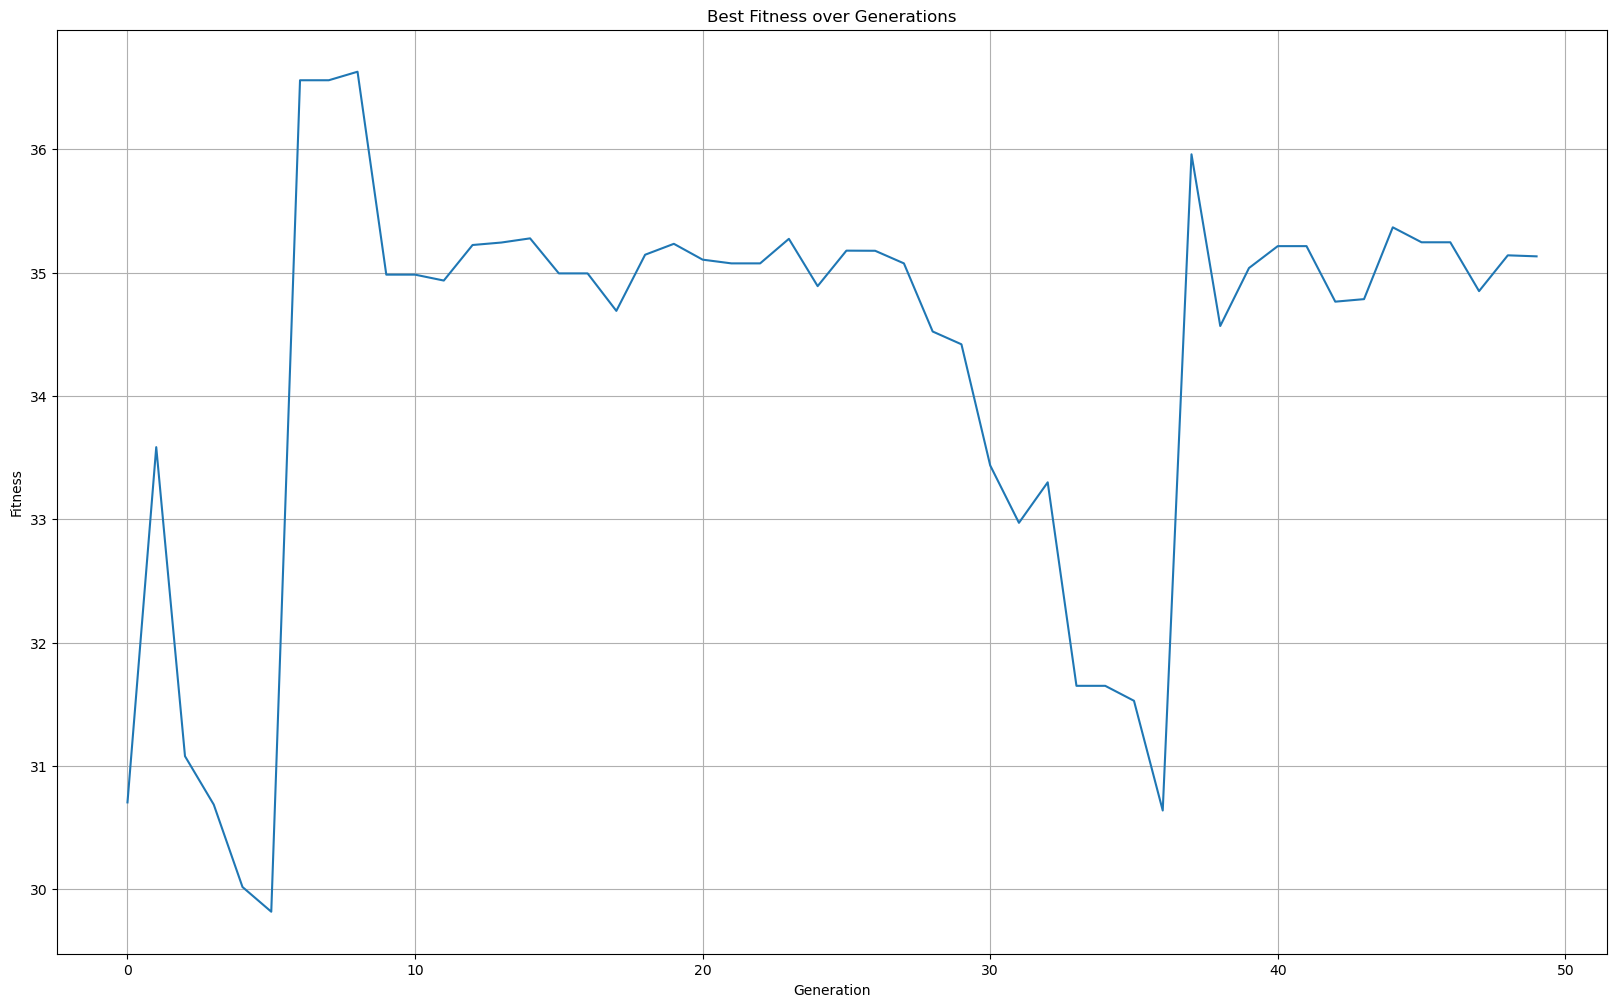


Best Solution: x = 11.1026, y = 4.6208
Best Fitness: 36.6277


In [43]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Objective function
def fitness_function(x, y):
    return 21.5 + x * np.sin(4 * np.pi * x) + y * np.sin(20 * np.pi * y)

# Encoding function to convert real values to binary string
def encode(value, bounds, bits):
    minimum, maximum = bounds
    # Normalize the value within the range [0, 1]
    normalized = (value - minimum) / (maximum - minimum)
    # Convert to integer representation
    int_value = int(normalized * (2**bits - 1))
    # Convert to binary string
    bin_value = format(int_value, f'0{bits}b')
    return bin_value

# Decoding function to convert binary string to real values
def decode(bin_string, bounds):
    minimum, maximum = bounds
    bits = len(bin_string)
    int_value = int(bin_string, 2)
    normalized = int_value / (2**bits - 1)
    value = minimum + normalized * (maximum - minimum)
    return value

# Roulette wheel selection
def roulette_wheel_selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    selection_probs = [f / total_fitness for f in fitness_scores]
    cumulative_probs = np.cumsum(selection_probs)
    r = random.random()
    for i, cumulative_prob in enumerate(cumulative_probs):
        if r <= cumulative_prob:
            return population[i]
    return population[-1]

# Single-point crossover
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutation function
def mutate(chromosome, mutation_rate):
    mutated = ''
    for bit in chromosome:
        if random.random() < mutation_rate:
            mutated += '1' if bit == '0' else '0'
        else:
            mutated += bit
    return mutated

# Genetic Algorithm parameters
POPULATION_SIZE = 30
NUM_GENERATIONS = 50
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.01
BITS_X = 17  # Increased bits for higher precision
BITS_Y = 15
BOUNDS_X = (-3.0, 12.1)
BOUNDS_Y = (4.1, 5.8)

# Initialize population
population = []
for _ in range(POPULATION_SIZE):
    x = random.uniform(*BOUNDS_X)
    y = random.uniform(*BOUNDS_Y)
    chromosome = encode(x, BOUNDS_X, BITS_X) + encode(y, BOUNDS_Y, BITS_Y)
    population.append(chromosome)

best_fitness_over_time = []
best_solution_over_time = []

for generation in range(NUM_GENERATIONS):
    # Decode chromosomes to real values
    decoded_population = []
    fitness_scores = []
    for chromosome in population:
        x_bin = chromosome[:BITS_X]
        y_bin = chromosome[BITS_X:]
        x = decode(x_bin, BOUNDS_X)
        y = decode(y_bin, BOUNDS_Y)
        fitness = fitness_function(x, y)
        decoded_population.append((x, y))
        fitness_scores.append(fitness)

    # Record the best fitness and solution
    max_fitness = max(fitness_scores)
    max_index = fitness_scores.index(max_fitness)
    best_solution = decoded_population[max_index]
    best_fitness_over_time.append(max_fitness)
    best_solution_over_time.append(best_solution)

    # Print generation stats
    print(f'Generation {generation + 1}: Best Fitness = {max_fitness:.4f}')

    # Selection
    new_population = []
    while len(new_population) < POPULATION_SIZE:
        parent1 = roulette_wheel_selection(population, fitness_scores)
        parent2 = roulette_wheel_selection(population, fitness_scores)
        
        # Crossover
        if random.random() < CROSSOVER_RATE:
            child1, child2 = crossover(parent1, parent2)
        else:
            child1, child2 = parent1, parent2
        
        # Mutation
        child1 = mutate(child1, MUTATION_RATE)
        child2 = mutate(child2, MUTATION_RATE)
        
        new_population.extend([child1, child2])
    
    # Truncate to population size
    population = new_population[:POPULATION_SIZE]

# Plot the fitness over generations
plt.figure(figsize=(20, 12))
plt.plot(best_fitness_over_time)
plt.title('Best Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()

# Print the best solution found
best_overall_fitness = max(best_fitness_over_time)
best_overall_index = best_fitness_over_time.index(best_overall_fitness)
best_overall_solution = best_solution_over_time[best_overall_index]
print(f'\nBest Solution: x = {best_overall_solution[0]:.4f}, y = {best_overall_solution[1]:.4f}')
print(f'Best Fitness: {best_overall_fitness:.4f}')
